In [1]:
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [7]:
# Carregando a base de dados, convertendo o atributo para data e criando a série temporal (ts)
base = pd.read_csv('AirPassengers.csv')
dateparse = lambda dates: datetime.strptime(dates,  '%Y-%m')
base = pd.read_csv('AirPassengers.csv', parse_dates=['Month'],
                   index_col='Month', date_parser=dateparse)
ts = base['#Passengers']

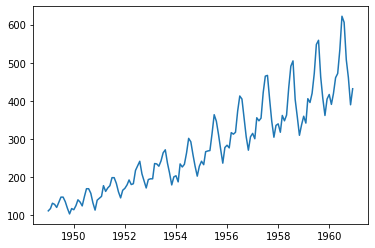

In [8]:
# Visualizando a série temporal
plt.plot(ts);

In [9]:
# Decomposição da série temporal, criando uma variável para cada formato
decomposicao = seasonal_decompose(ts)

In [10]:
# Tendência
tendencia = decomposicao.trend
tendencia

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [11]:
# Sazonalidade
sazonal = decomposicao.seasonal
sazonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [12]:
# erro
aleatorio = decomposicao.resid
aleatorio

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

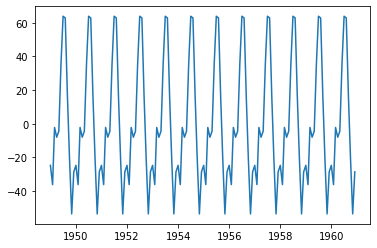

In [13]:
# Visualização para cada formato da série temporal
plt.plot(sazonal);

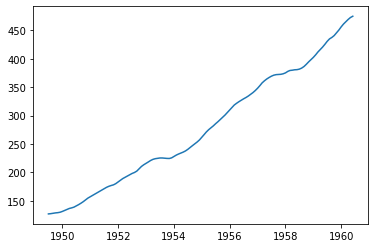

In [14]:
plt.plot(tendencia);

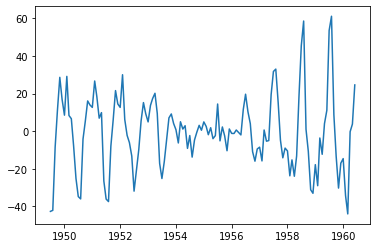

In [15]:
plt.plot(aleatorio);

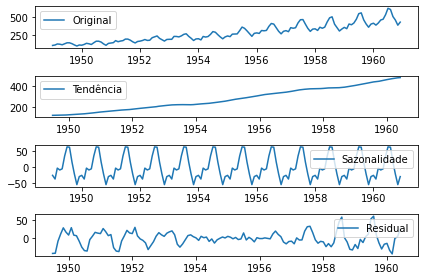

In [19]:
plt.subplot(4, 1, 1)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

# Visualização somente da tendência
plt.subplot(4, 1, 2)
plt.plot(tendencia, label = 'Tendência')
plt.legend(loc = 'best')

# Visualização somente da sazonalidade
plt.subplot(4, 1, 3)
plt.plot(sazonal, label = 'Sazonalidade')
plt.legend(loc = 'best')

# Visualização somente dos resíduos
plt.subplot(4, 1, 4)
plt.plot(aleatorio, label = 'Residual')
plt.legend(loc = 'best')

plt.tight_layout()